# Analizing Magnatagatune

In [1]:
import collections
import csv
import operator
import os

import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
PATH_DATASET = 'datasets/magnatagatune'
ANNOTATIONS_CSV = os.path.join(PATH_DATASET, 'annotations_final.csv')

genres = {}
with open(ANNOTATIONS_CSV, 'r') as tsvfile:
    reader = csv.DictReader(tsvfile, dialect='excel-tab')
    genres = {genre: 0 for genre in reader.fieldnames[1:-1]}  # 0:clip_id, -1:mp3_path
    for row in reader:
        for tag in genres:
            genres[tag] += int(row[tag])

188
['guitar', 'classical', 'slow', 'techno', 'strings', 'drums', 'electronic', 'rock', 'fast', 'piano', 'ambient', 'beat', 'violin', 'vocal', 'synth', 'female', 'indian', 'opera', 'male', 'singing', 'vocals', 'no vocals', 'harpsichord', 'loud', 'quiet', 'flute', 'woman', 'male vocal', 'pop', 'no vocal', 'soft', 'sitar', 'solo', 'man', 'classic', 'choir', 'voice', 'new age', 'dance', 'female vocal', 'male voice', 'beats', 'harp', 'cello', 'no voice', 'weird', 'country', 'metal', 'female voice', 'choral']


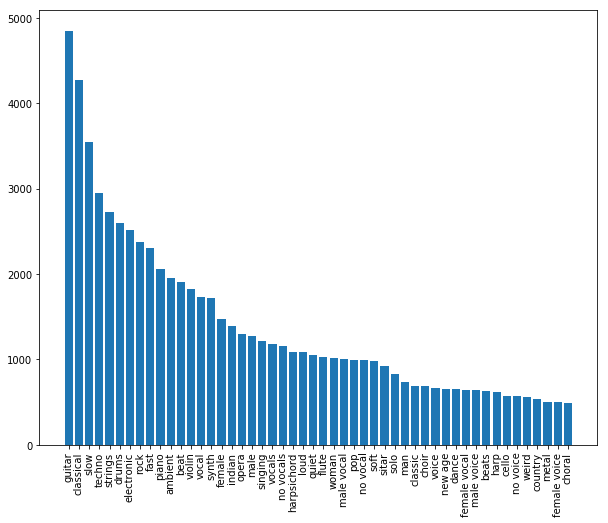

In [7]:
def plot_genre_dict(genres, top=None):
    print(len(genres))
    if top == None:
        top = len(genres.items())
    sorted_genres = list(reversed(sorted(genres.items(), key=operator.itemgetter(1))))
    top_genres = sorted_genres[:top]
    print([g for g, _ in top_genres])
    #print([t[0] for t in top_genres])
    plt.bar(range(len(top_genres)), [d[1] for d in top_genres], align='center')
    plt.xticks(range(len(top_genres)), [d[0] for d in top_genres], rotation='vertical')
    plt.show()
    
plot_genre_dict(genres, top=50)

**PROBLEM**: not all tags are genres. Let's see them.

In [ ]:
for tag in sorted(genres, key=operator.itemgetter(0))[:50]:
    print(tag)

In [ ]:
genre_tags = [
    'ambient',
    'arabic',
    'blues',
    'baroque',
    ('classical', 'clasical'),
    ('choir', 'choral'),
    'country',
    'celtic',
    'disco',
    'dance',
    ('funk', 'funky'),
    ('electronica', 'electro'),
    #('female voice', 'female vocal', 'female vocals', 'female singer', 'female singing', 'woman singing'),
    #('male voice', 'male vocal', 'male vocals', 'male singer', 'man singing'),
    'folk',
    'happy',
    'eastern',
    'middle eastern',
    'medieval',
    ('heavy metal', 'heavy', 'metal'),
    'hip hop',
    'industrial',
    ('indian', 'india'),
    'irish',
    ('jazz', 'jazzy'),
    'jungle',
    'new age',
    ('instrumental', 'no voice', 'no voices', 'no singing', 'no vocal', 'no vocals'),
    ('opera', 'male opera', 'female opera', 'operatic'),
    'oriental',
    'pop',
    'punk',
    'reggae',
    'rock',
    'hard rock',
    'soft rock',
    'rap',
    'trance',
    'techno',
    'world',
]

genre_dict = {}
accepted_genres = set()
for genre in genre_tags:
    if isinstance(genre, tuple):
        for genre_i in genre:
            genre_dict[genre_i] = genre[0]
        accepted_genres.add(genre[0])
    else:
        genre_dict[genre] = genre
        accepted_genres.add(genre)

print(len(accepted_genres))
assert len(accepted_genres) == len(genre_tags)

In [ ]:
genres = {g: 0 for g in accepted_genres}
with open(ANNOTATIONS_CSV, 'r') as tsvfile:
    reader = csv.DictReader(tsvfile, dialect='excel-tab')
    for row in reader:
        for tag, accepted_genre in genre_dict.items():
            genres[accepted_genre] += int(row[tag])

In [ ]:
plot_genre_dict(genres, top=30)

After grouping the ones I'm interested in, it turns out it's the same ones as before.
The dataset is sadly not balanced, but we'll work with it since it seems to be quite a standard.

In [ ]:
with open(ANNOTATIONS_CSV, 'r') as tsvfile:
    reader = csv.DictReader(tsvfile, dialect='excel-tab')
    genres = {genre: 0 for genre in reader.fieldnames[1:-1]}  # 0:clip_id, -1:mp3_path
    for row in reader:
        print([g for g in genres if row[g] == '1'])

In [ ]:
import tensorflow as tf

with tf.Graph().as_default():
    c  = tf.Variable([1,2, 3], name='c')
    init_op = tf.global_variables_initializer()
    saver = tf.train.Saver()
    with tf.Session() as sess:
      sess.run(init_op)
      save_path = saver.save(sess, "test.ckpt")

In [ ]:
with tf.Graph().as_default():
    c  = tf.Variable([0,0,0], name='c')
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, "test.ckpt")
        init_op = tf.global_variables_initializer()
        sess.run(init_op)
        print(c)

In [ ]:
import librosa
import librosa.display
import _pickle as pickle

def plot_spectogram(x, tag=None):
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(x.T, y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    if tag:
        plt.title('Melspectogram for ' + genre + ' 0')
        plt.tight_layout()
        

with open('datasets/magnatagatune/train/0.pickle', 'rb') as f:
    spectogram = pickle.load(f)
    print(spectogram.shape)
    plot_spectogram(spectogram)
    
with open('datasets/magnatagatune/train/filenames.pickle', 'rb') as f:
    print(pickle.load(f)[0])
    

with open('datasets/magnatagatune/train/labels.pickle', 'rb') as f:
    print(pickle.load(f)[0])

In [ ]:
import numpy as np


CLASSES = [
    'classical', 'instrumental', 'electronica', 'techno',
    'male voice', 'rock', 'ambient', 'female voice', 'opera',
    'indian', 'choir', 'pop', 'heavy metal', 'jazz', 'new age',
    'dance', 'country', 'eastern', 'baroque', 'funk', 'hard rock',
    'trance', 'folk', 'oriental', 'medieval', 'irish', 'blues',
    'middle eastern', 'punk', 'celtic', 'arabic', 'rap',
    'industrial', 'world', 'hip hop', 'disco', 'soft rock',
    'jungle', 'reggae', 'happy',
]
CLASSES_DICT = {c: i for i, c in enumerate(CLASSES)}

def get_class_vector(genres):
    class_indices = np.array([CLASSES_DICT[g] for g in genres])
    vector = np.zeros(len(CLASSES))
    vector[class_indices] = 1
    return vector

with open('datasets/magnatagatune/annotations_final.csv', 'r') as tsvfile:
    reader = csv.DictReader(tsvfile, dialect='excel-tab')
    for i, row in enumerate(reader):
        if row['mp3_path'] == '2/anup-embrace-08-resolve-117-146.mp3':
            print([g for g in row if row[g] == '1'])
            print(get_class_vector([g for g in CLASSES if row[g] == '1']))

In [ ]:
for serialized_example in tf.python_io.tf_record_iterator('datasets/magnatagatune/train/data.tfrecords'):
    example = tf.train.Example()
    example.ParseFromString(serialized_example)

In [ ]:
x = """
Epoch 1 / 100
  Train accuracy: 26.228497
  Val accuracy: 26.282499

Epoch 2 / 100
  Train accuracy: 26.339452
  Val accuracy: 26.403020

Epoch 3 / 100
  Train accuracy: 26.122354
  Val accuracy: 26.165532

Epoch 4 / 100
  Train accuracy: 22.425833
  Val accuracy: 22.456322

Epoch 5 / 100
  Train accuracy: 25.911103
  Val accuracy: 25.989044

Epoch 6 / 100
  Train accuracy: 24.456995
  Val accuracy: 24.555819

Epoch 7 / 100
  Train accuracy: 23.011917
  Val accuracy: 23.167308

Epoch 8 / 100
  Train accuracy: 22.304737
  Val accuracy: 22.315369

Epoch 9 / 100
  Train accuracy: 23.682976
  Val accuracy: 23.803672

Epoch 10 / 100
  Train accuracy: 26.418431
  Val accuracy: 26.385253

Epoch 11 / 100
  Train accuracy: 26.240415
  Val accuracy: 26.255848

Epoch 12 / 100
  Train accuracy: 26.240415
  Val accuracy: 26.255848

Epoch 13 / 100
  Train accuracy: 26.240415
  Val accuracy: 26.255848

Epoch 14 / 100
  Train accuracy: 26.240415
  Val accuracy: 26.255848

Epoch 15 / 100
  Train accuracy: 26.240415
  Val accuracy: 26.255848

Epoch 16 / 100
  Train accuracy: 26.240415
  Val accuracy: 26.255848
  
Epoch 17 / 100
  Train accuracy: 26.240415
  Val accuracy: 26.255848
"""

